# Classification Hackathon

© Explore Data Science Academy

---


### Overview:

South Africa is a multicultural society that is characterised by its rich linguistic diversity. Language is an indispensable tool that can be used to deepen democracy and also contribute to the social, cultural, intellectual, economic and political life of the South African society.

The country is multilingual with 11 official languages, each of which is guaranteed equal status. Most South Africans are multilingual and able to speak at least two or more of the official languages.
From [South African Government](https://www.gov.za/about-sa/south-africas-people).


With such a multilingual population, it is only obvious that our systems and devices also communicate in multi-languages.

In this challenge, you will take text which is in any of South Africa's 11 Official languages and identify which language the text is in. This is an example of NLP's Language Identification, the task of determining the natural language that a piece of text is written in.

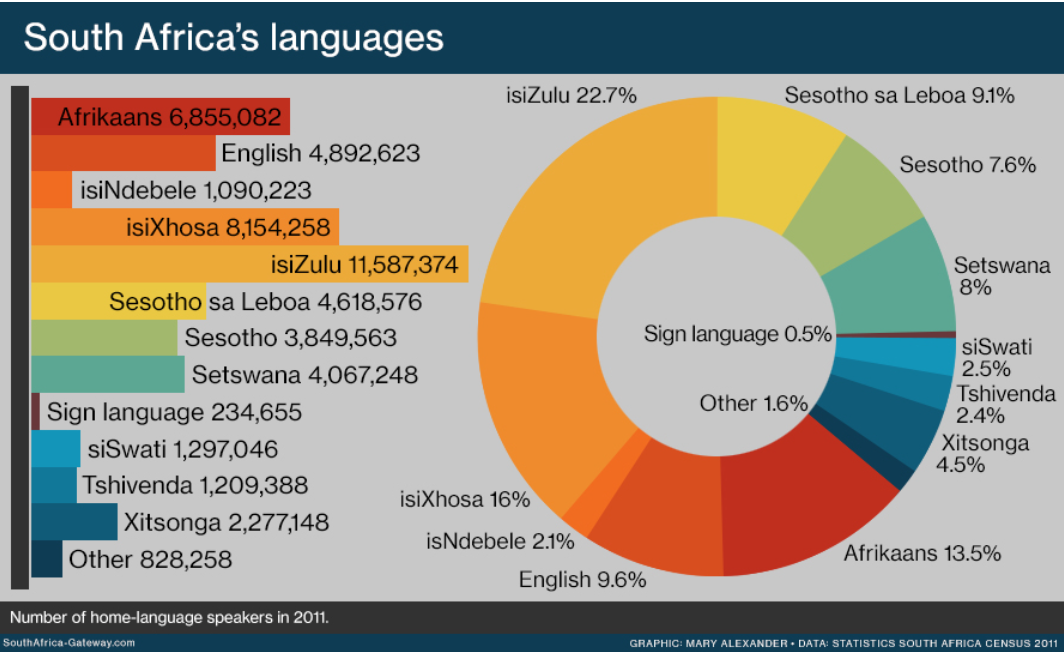

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Random Forest Classifier</a>

<a href=#six>6. Linear Support Vector Classifier</a>

<a href=#seven>7. Model Performance</a>

<a href=#eight>8. Saving Predictions</a>

<a href=#nine>9. Conclusion</a>

<a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---

In [1]:
# Imports for Natural Language  Processing
import pandas as pd
import numpy as np
import nltk
import string

# Preprocessing
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
import string
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Classification models
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

# Hyperparameter tunning methods
from sklearn.model_selection import train_test_split

# Metrics
from sklearn import metrics
from sklearn.metrics import classification_report

# Imports for data visualisation
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

###### <a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

* The dataset used for this challenge is the NCHLT Text Corpora collected by the South African Department of Arts and Culture & Centre for Text Technology (CTexT, North-West University, South Africa). 
* The training set was improved through additional cleaning done by Praekelt.

#### Language IDs
* afr - Afrikaans
* eng - English
* nbl - isiNdebele
* nso - Sepedi
* sot - Sesotho
* ssw - siSwati
* tsn - Setswana
* tso - Xitsonga
* ven - Tshivenda
* xho - isiXhosa
* zul - isiZulu

In [2]:
train = pd.read_csv('train_set.csv')
test = pd.read_csv('test_set.csv')

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

* For ease of comprehension, I will perform EDA on the data. 
* This will aid in understanding patterns in the data, pinpoint any outliers, and identify relationships between variables.
* This will make the modeling process far easier.

In [3]:
train.head(10)

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...
5,nso,dinyakišišo tše tša go dirwa gabedi ka ngwaga ...
6,tsn,kgetse nngwe le nngwe e e sa faposiwang mo tsh...
7,ven,mbadelo dze dza laelwa dzi do kwama mahatulele...
8,nso,maloko a dikhuduthamaga a ikarabela mongwe le ...
9,tsn,fa le dirisiwa lebone le tshwanetse go bontsha...


In [4]:
# Number of rows to columns

train.shape

(33000, 2)

In [5]:
# Simple analysis of each column

train.describe()

,lang_id,text
count,33000,33000
unique,11,29948
top,xho,ngokwesekhtjheni yomthetho ophathelene nalokhu...
freq,3000,17


In [6]:
# Simple overview of the dataset

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


<AxesSubplot:xlabel='lang_id', ylabel='count'>

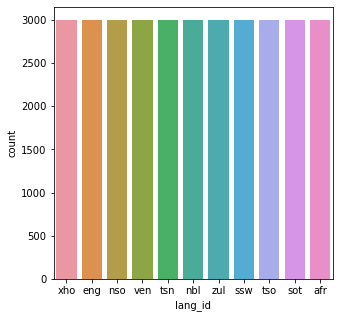

In [7]:
# Plotting the number of times each language is recorded

fig = plt.figure(figsize = (5,5))
sns.countplot(x = 'lang_id', data = train)

#### From this EDA we can conclude that:
* No *null* values are recorded
* Both columns in the dataset are of type `object`
* Each language is recorded 3000 times

###### <a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

#### I will be using vectorization as part of the data pre-processing stage
* By using a vectorized implementation in an optimization algorithm we can make the process of computation much faster compared to Unvectorized Implementation.
* Vectorization is the process of transforming a scalar operation acting on individual data elements (Single Instruction Single Data—SISD) to an operation where a single instruction operates concurrently on multiple data elements (SIMD).

In [8]:
# Vectorizing the text data

vectorizer = TfidfVectorizer(stop_words='english', 
                             min_df=2, 
                             max_df=0.5, 
                             ngram_range=(1, 1))

In [9]:
X = vectorizer.fit_transform(train['text'])

y = train['lang_id']

In [10]:
scaler = preprocessing.MaxAbsScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
# Splitting the data for training

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state = 42)

<a id="five"></a>
## 5. Random Forest Classifier
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

* The random forest is a classification algorithm consisting of many decisions trees. 
* It uses bagging and feature randomness when building each individual tree to try to create an uncorrelated forest of trees whose prediction by committee is more accurate than that of any individual tree.

In [12]:
# Random Forest classifier

rfc = RandomForestClassifier(n_estimators = 20, random_state = 30)

In [13]:
# Fitting the model

rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20, random_state=30)

In [14]:
tester = vectorizer.transform(test['text'])

In [15]:
# Making predictions
pred = rfc.predict(X_val)
rfc_prediction = rfc.predict(tester)

<a id="six"></a>
## 6. Linear Support Vector Classifier
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

* SVM or Support Vector Machine is a linear model for classification and regression problems. 
* It can solve linear and non-linear problems and work well for many practical problems. 
* The idea of SVM is simple: The algorithm creates a line or a hyperplane which separates the data into classes.

In [16]:
# Creating Linear Support Vector Model 

lsvc_model = LinearSVC(C = 0.3906939937054613, class_weight = None, dual = True,
          fit_intercept = True, intercept_scaling = 1, loss = 'squared_hinge',
          max_iter = 1000, multi_class = 'ovr', penalty = 'l2', random_state = None,
          tol = 0.0001, verbose = 0) 

In [17]:
# Fitting the model with the data

lsvc_model.fit(X_train, y_train)

LinearSVC(C=0.3906939937054613)

In [18]:
# Using the model to make predictions

LinearSVC_prediction = lsvc_model.predict(X_val)
Linear_SVC_pred = lsvc_model.predict(tester)

<a id="seven"></a>
## 7. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

* A classification report is a performance evaluation metric in machine learning. 
* It is used to show the precision, recall, F1 Score, and support of your trained classification model.

In [19]:
# Random Forest Classifier Report 

rfc_model_acc = classification_report(y_val, pred)
print('Random Forest Classifier:')
print(rfc_model_acc)

Random Forest Classifier:
              precision    recall  f1-score   support

         afr       0.99      1.00      0.99       281
         eng       0.92      1.00      0.96       297
         nbl       0.98      0.93      0.96       327
         nso       0.99      0.98      0.99       322
         sot       1.00      0.99      1.00       307
         ssw       0.97      0.97      0.97       286
         tsn       0.98      0.99      0.99       297
         tso       1.00      1.00      1.00       253
         ven       1.00      1.00      1.00       322
         xho       0.98      0.92      0.95       313
         zul       0.93      0.96      0.94       295

    accuracy                           0.98      3300
   macro avg       0.98      0.98      0.98      3300
weighted avg       0.98      0.98      0.98      3300



In [20]:
# Linear Support Vector Model Report

lsvc_report = classification_report(y_val, LinearSVC_prediction)
print('Linear Support Vector Classifier:')
print(lsvc_report)

Linear Support Vector Classifier:
              precision    recall  f1-score   support

         afr       0.99      0.99      0.99       281
         eng       0.99      1.00      0.99       297
         nbl       1.00      0.99      0.99       327
         nso       1.00      0.99      1.00       322
         sot       1.00      1.00      1.00       307
         ssw       1.00      1.00      1.00       286
         tsn       1.00      1.00      1.00       297
         tso       1.00      1.00      1.00       253
         ven       1.00      1.00      1.00       322
         xho       0.99      1.00      1.00       313
         zul       0.99      0.99      0.99       295

    accuracy                           1.00      3300
   macro avg       1.00      1.00      1.00      3300
weighted avg       1.00      1.00      1.00      3300



<a id="eight"></a>
## 8. Saving Predicitions
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

In [21]:
# Saving Linear Support Vector Classifier Predictions

language2 = pd.DataFrame(Linear_SVC_pred, columns = ['lang_id'])
index2 = pd.DataFrame({'index': test['index']})
language2 = index2.join(language2)
language2.to_csv('Linear_SVC.csv', index = False)
language2

,index,lang_id
0,1,tsn
1,2,nbl
2,3,ven
3,4,ssw
4,5,afr
...,...,...
5677,5678,eng
5678,5679,nso
5679,5680,sot
5680,5681,sot


<a id="nine"></a>
## 9. Conclusion
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---


As we look at the reports for each model, we can see that the `Linear Support Vector Classifier` model performs slightly better than the `Random Forest Classifier`.
* The f1-score, precision, and recal is better
* Accuracy, macro avg, and weighted avg is also higher

Due to these statistics we can conclude that the `Linear Support Vector Classifier` model perfroms better. Therefore, the predictions have been saved to a csv file.

#### References

* https://thecleverprogrammer.com/2021/10/30/language-detection-with-machine-learning/
* https://www.analyticsvidhya.com/blog/2021/03/language-detection-using-natural-language-processing/